In [2]:
import pandas as pd
import numpy as np


X = pd.read_csv('en_sent_merged2.csv', usecols=['id','host_is_superhost','latitude','longitude','accommodates',
                                      'bathrooms_text','bedrooms','beds','amenities','price','minimum_nights',
                                      'number_of_reviews','review_scores_value','sentiment', 'room_type',
                                      'property_type'], low_memory=False)

In [3]:
scale_mapper = {
    "f": 0,
    "t": 1,
}

X['host_is_superhost'] = X['host_is_superhost'].replace(scale_mapper)

In [4]:
import re
# get the numerical value in column 'bathrooms_text'
X['bathrooms_text'] = X['bathrooms_text'].str.extract(r'(\d+\.?\d*)', expand=False)

X['price'] = X['price'].str.extract(r'(\d+\.?\d*)', expand=False)

X.bathrooms_text = pd.to_numeric(X.bathrooms_text)
X['bathrooms_text'].fillna(X['bathrooms_text'].mean(), inplace=True)

X.accommodates = pd.to_numeric(X.accommodates)
X['accommodates'].fillna(X['accommodates'].mean(), inplace=True)

X.latitude = pd.to_numeric(X.latitude)
X['latitude'].fillna(X['latitude'].mean(), inplace=True)

X.longitude = pd.to_numeric(X.longitude)
X['longitude'].fillna(X['longitude'].mean(), inplace=True)

X['host_is_superhost'] = X['host_is_superhost'].replace('Entire home/apt','1')
X.host_is_superhost = pd.to_numeric(X.host_is_superhost)
X['host_is_superhost'].fillna(X['host_is_superhost'].mean(), inplace=True)

X.bedrooms = pd.to_numeric(X.bedrooms)
X['bedrooms'].fillna(X['bedrooms'].mean(), inplace=True)

X.beds = pd.to_numeric(X.beds)
X['beds'].fillna(X['beds'].mean(), inplace=True)

X.price = pd.to_numeric(X.price)
X['price'].fillna(X['price'].mean(), inplace=True)

X.minimum_nights = pd.to_numeric(X.minimum_nights)
X['minimum_nights'].fillna(X['minimum_nights'].mean(), inplace=True)

X.number_of_reviews = pd.to_numeric(X.number_of_reviews)
X['number_of_reviews'].fillna(X['number_of_reviews'].mean(), inplace=True)

In [5]:
X.isna().sum()

id                       0
host_is_superhost        0
latitude                 0
longitude                0
property_type           10
room_type               10
accommodates             0
bathrooms_text           0
bedrooms                 0
beds                     0
amenities               10
price                    0
minimum_nights           0
number_of_reviews        0
review_scores_value    162
sentiment               10
dtype: int64

In [6]:
X.property_type.unique()

array(['Private room in bungalow', 'Private room in home',
       'Private room in townhouse', 'Entire rental unit', 'Entire home',
       'Entire loft', 'Private room in rental unit', 'Entire condo',
       'Entire cottage', 'Entire townhouse', 'Private room in guesthouse',
       'Private room in bed and breakfast', 'Boat',
       'Entire serviced apartment', 'Private room in condo', 'Tiny home',
       'Shared room in condo', 'Entire guest suite', 'Entire cabin',
       'Entire guesthouse', 'Entire bungalow', 'Private room in loft',
       'Shared room in rental unit', 'Private room in villa',
       'Private room in cottage', 'Shared room in loft', 'Castle',
       'Private room in serviced apartment', 'Private room in cabin',
       'Entire place', 'Entire villa', 'Private room',
       'Private room in guest suite', nan, 'Farm stay',
       'Shared room in home', 'Private room in floor',
       'Room in aparthotel', 'Shared room', 'Entire chalet', 'Tipi',
       'Room in serviced

In [14]:
X['property_type'] = X.property_type.str.replace(r'(^.*Room.*$)', 'Room')

/var/folders/rd/j5mq0pcd6c3b6ld8pnmj2xnw0000gn/T/ipykernel_5079/3010397825.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  X['property_type'] = X.property_type.str.replace(r'(^.*Room.*$)', 'Room')


In [15]:
X.property_type.unique()

array(['Room', 'House', 'Boat', 'Tiny home', 'Castle', nan, 'Farm stay',
       'Tipi', 'Hut', 'Houseboat', 'Barn', 'Casa particular', 'Dome',
       'Camper/RV'], dtype=object)

In [16]:
X.loc[~X.property_type.isin(['House', 'Room']), 'property_type'] = 'Other'

In [17]:
scale_mapper = {
    "Private room": 0,
    "Entire home/apt": 1,
    "Shared room" : 2,
    "Hotel room" : 3
}

X['room_type'] = X['room_type'].replace(scale_mapper)

In [18]:
scale_mapper = {
    "Room": 0,
    "House": 1,
    "Other" : 2,
}

X['property_type'] = X['property_type'].replace(scale_mapper)

In [11]:
cols = X.columns.drop('id')
X[cols] = X[cols].apply(pd.to_numeric, errors='coerce')

In [33]:
amenities_list = []

for element in X.amenities:
    element  = str(element)
    element = element[1:]
    element = element[:-1]
    x = element.split()
    amenities_list.append(len(x))

X.amenities = amenities_list

In [34]:
X.count()

id                     202422
host_is_superhost      202422
latitude               202422
longitude              202422
property_type          202422
room_type              202422
accommodates           202422
bathrooms_text         202422
bedrooms               202422
beds                   202422
amenities              202422
price                  202422
minimum_nights         202422
number_of_reviews      202422
review_scores_value    202422
sentiment              202422
rating_bins            202422
dtype: int64

In [35]:
X.isna().sum()

id                     0
host_is_superhost      0
latitude               0
longitude              0
property_type          0
room_type              0
accommodates           0
bathrooms_text         0
bedrooms               0
beds                   0
amenities              0
price                  0
minimum_nights         0
number_of_reviews      0
review_scores_value    0
sentiment              0
rating_bins            0
dtype: int64

In [22]:
X['room_type'].fillna(X['room_type'].mean(), inplace=True)
X['review_scores_value'].fillna(X['review_scores_value'].mean(), inplace=True)
X['sentiment'].fillna(X['sentiment'].mean(), inplace=True)

In [36]:
X.isna().sum()

id                     0
host_is_superhost      0
latitude               0
longitude              0
property_type          0
room_type              0
accommodates           0
bathrooms_text         0
bedrooms               0
beds                   0
amenities              0
price                  0
minimum_nights         0
number_of_reviews      0
review_scores_value    0
sentiment              0
rating_bins            0
dtype: int64

In [24]:
X.count()

id                     203307
host_is_superhost      203307
latitude               203307
longitude              203307
property_type          203307
room_type              203307
accommodates           203307
bathrooms_text         203307
bedrooms               203307
beds                   203307
amenities              203297
price                  203307
minimum_nights         203307
number_of_reviews      203307
review_scores_value    203307
sentiment              203307
dtype: int64

In [25]:
X.loc[~X.host_is_superhost.isin([0, 1]), 'host_is_superhost'] = 1

In [26]:
X.host_is_superhost.value_counts()

0.0    133328
1.0     69979
Name: host_is_superhost, dtype: int64

In [27]:
X = X.loc[(X.review_scores_value <= 5) & (X.review_scores_value >= 4)]

In [28]:
X.count()

id                     202422
host_is_superhost      202422
latitude               202422
longitude              202422
property_type          202422
room_type              202422
accommodates           202422
bathrooms_text         202422
bedrooms               202422
beds                   202422
amenities              202412
price                  202422
minimum_nights         202422
number_of_reviews      202422
review_scores_value    202422
sentiment              202422
dtype: int64

In [29]:
X = X.assign(
    rating_bins = pd.qcut(
        X['review_scores_value'],
        q=4,
        labels=[0,1,2,3]
    )
)

/Users/pallavit/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='rating_bins', ylabel='count'>

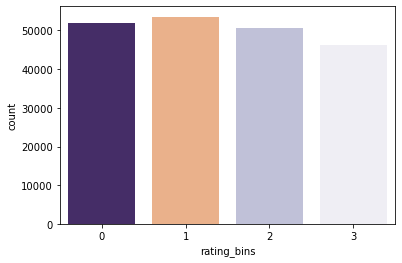

In [38]:
import seaborn as sns
sns.countplot(X['rating_bins'], palette=['#432371',"#FAAE7B", "#bcbddc", "#efedf5"])

In [37]:
result = X.groupby('rating_bins').agg({'review_scores_value': ['mean', 'min', 'max']})
print("Mean, min, and max values :")
print(result)

Mean, min, and max values :
            review_scores_value            
                           mean   min   max
rating_bins                                
0                      4.463172  4.00  4.60
1                      4.675546  4.61  4.73
2                      4.786736  4.74  4.83
3                      4.895426  4.84  5.00


In [43]:
result = X.groupby('host_is_superhost').agg({'review_scores_value': ['mean', 'min', 'max']})
print("Mean, min, and max values :")
print(result)

Mean, min, and max values :
                  review_scores_value           
                                 mean   min  max
host_is_superhost                               
0.0                          4.651578  3.91  5.0
1.0                          4.787812  4.00  5.0


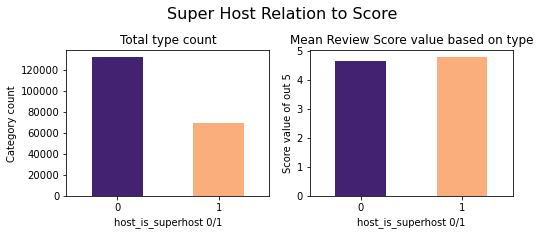

In [42]:
import matplotlib.pyplot as plt
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8,3))
fig.suptitle('Super Host Relation to Score', fontsize=16, y=1)
plt.subplots_adjust(top=0.80) # So that the suptitle does not overlap with the ax plot titles
    
X.groupby('host_is_superhost').size().plot(kind='bar', ax=ax1, color=['#432371',"#FAAE7B", "#bcbddc", "#efedf5"])
ax1.set_xticklabels(labels=[0, 1], rotation=0)
ax1.set_title('Total type count')
ax1.set_xlabel('host_is_superhost 0/1')
ax1.set_ylabel('Category count')
    
X.groupby('host_is_superhost').review_scores_value.mean().plot(kind='bar', ax=ax2, color=['#432371',"#FAAE7B", "#bcbddc", "#efedf5"])
ax2.set_xticklabels(labels=[0, 1], rotation=0)
ax2.set_title('Mean Review Score value based on type')
ax2.set_xlabel('host_is_superhost 0/1')  
ax2.set_ylabel('Score value of out 5')
plt.show()


In [60]:
X.corr().style.background_gradient(cmap='coolwarm').set_precision(2)

/var/folders/rd/j5mq0pcd6c3b6ld8pnmj2xnw0000gn/T/ipykernel_4495/2694154310.py:1: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  X.corr().style.background_gradient(cmap='coolwarm').set_precision(2)


,host_is_superhost,latitude,longitude,property_type,room_type,accommodates,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,number_of_reviews,review_scores_value,sentiment
host_is_superhost,1.00,0.01,0.01,-0.12,0.01,-0.01,-0.02,0.02,-0.02,0.28,0.09,-0.03,0.18,0.37,0.10
latitude,0.01,1.00,1.00,0.00,0.91,-0.00,-0.02,0.09,0.04,-0.01,-0.01,0.00,-0.00,0.00,-0.00
longitude,0.01,1.00,1.00,-0.01,0.91,-0.00,-0.02,0.09,0.04,-0.01,-0.01,0.00,-0.01,0.00,0.00
property_type,-0.12,0.00,-0.01,1.00,-0.02,0.06,0.03,0.07,0.03,0.01,0.05,0.04,-0.00,-0.10,-0.01
room_type,0.01,0.91,0.91,-0.02,1.00,0.17,0.02,0.22,0.21,0.05,0.15,0.04,-0.00,-0.06,-0.00
accommodates,-0.01,-0.00,-0.00,0.06,0.17,1.00,0.52,0.83,0.71,0.18,0.55,0.04,-0.09,-0.10,0.01
bathrooms_text,-0.02,-0.02,-0.02,0.03,0.02,0.52,1.00,0.59,0.37,0.13,0.30,0.00,-0.13,0.01,0.01
bedrooms,0.02,0.09,0.09,0.07,0.22,0.83,0.59,1.00,0.64,0.15,0.52,0.04,-0.16,-0.02,0.02
beds,-0.02,0.04,0.04,0.03,0.21,0.71,0.37,0.64,1.00,0.16,0.37,0.03,-0.05,-0.08,-0.01
amenities,0.28,-0.01,-0.01,0.01,0.05,0.18,0.13,0.15,0.16,1.00,0.19,-0.02,0.15,0.18,0.07


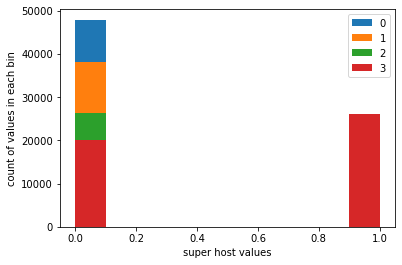

In [66]:
for name, group in X.groupby('rating_bins'):
    plt.hist(group['host_is_superhost'], label=name)
    plt.xlabel('super host values')
    plt.ylabel('count of values in each bin')
    plt.legend()

<AxesSubplot:>

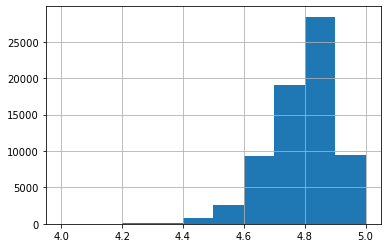

In [64]:
X[X['host_is_superhost']==1].review_scores_value.hist(bins=10)

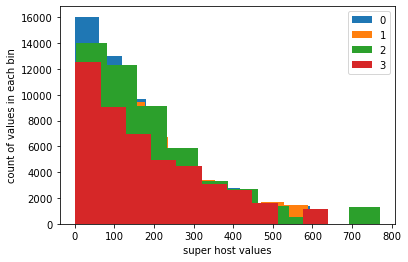

In [70]:
for name, group in X.groupby('rating_bins'):
    plt.hist(group['number_of_reviews'], label=name)
    plt.xlabel('super host values')
    plt.ylabel('count of values in each bin')
    plt.legend()

In [71]:
result = X.groupby('number_of_reviews').agg({'review_scores_value': ['mean', 'min', 'max']})
print("Mean, min, and max values :")
print(result)

Mean, min, and max values :
                  review_scores_value            
                                 mean   min   max
number_of_reviews                                
1.0                          4.719207  4.00  5.00
2.0                          4.729271  4.00  5.00
3.0                          4.699568  4.00  5.00
4.0                          4.713785  4.00  5.00
5.0                          4.684400  4.00  5.00
...                               ...   ...   ...
594.0                        4.560000  4.56  4.56
616.0                        4.920000  4.92  4.92
640.0                        4.870000  4.87  4.87
725.0                        4.800000  4.80  4.80
770.0                        4.800000  4.80  4.80

[356 rows x 3 columns]


In [81]:
X = X.assign(
    number_bins = pd.qcut(
        X['number_of_reviews'],
        q=10,
        labels=[0,1,2,3,4,5,6,7,8,9]
    )
)

In [82]:
X.number_bins.value_counts()

0    20972
4    20874
8    20818
7    20599
1    20216
3    19996
5    19956
2    19948
6    19903
9    19340
Name: number_bins, dtype: int64

In [83]:
result = X.groupby('number_bins').agg({'review_scores_value': ['mean', 'min', 'max']})
print("Mean, min, and max values :")
print(result)

Mean, min, and max values :
            review_scores_value            
                           mean   min   max
number_bins                                
0                      4.675919  3.91  5.00
1                      4.669396  3.94  5.00
2                      4.669333  4.07  5.00
3                      4.678005  4.01  4.99
4                      4.694155  4.11  4.97
5                      4.700264  4.21  4.97
6                      4.702556  4.23  4.96
7                      4.730189  4.21  4.95
8                      4.734796  4.36  4.95
9                      4.731968  4.24  4.96


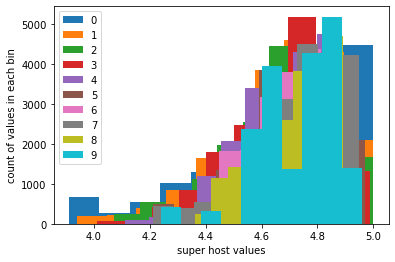

In [84]:
for name, group in X.groupby('number_bins'):
    plt.hist(group['review_scores_value'], label=name)
    plt.xlabel('super host values')
    plt.ylabel('count of values in each bin')
    plt.legend()

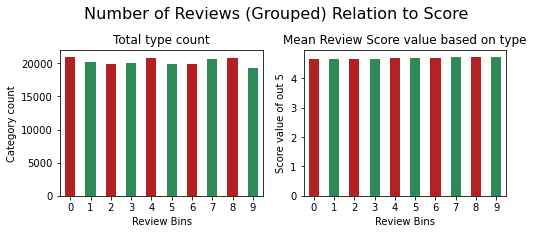

In [91]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8,3))
fig.suptitle('Number of Reviews (Grouped) Relation to Score', fontsize=16, y=1)
plt.subplots_adjust(top=0.80) # So that the suptitle does not overlap with the ax plot titles
    
X.groupby('number_bins').size().plot(kind='bar', ax=ax1, color=['firebrick', 'seagreen'])
ax1.set_xticklabels(labels=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9], rotation=0)
ax1.set_title('Total type count')
ax1.set_xlabel('Review Bins')
ax1.set_ylabel('Category count')
    
X.groupby('number_bins').review_scores_value.mean().plot(kind='bar', ax=ax2, color=['firebrick', 'seagreen'])
ax2.set_xticklabels(labels=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9], rotation=0)
ax2.set_title('Mean Review Score value based on type')
ax2.set_xlabel('Review Bins')  
ax2.set_ylabel('Score value of out 5')
plt.show()

<AxesSubplot:>

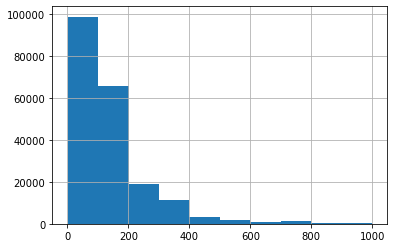

In [93]:
X.price.hist(bins=10)

In [44]:
X = X.assign(
    price_bin = pd.cut(
        X['price'],
        bins=[0, 100, 200, 300, 400, 600, 1000],
        duplicates='drop',
        labels=['0-100','100-200', '200-300', '300-400', '400-600', '600-1000']
    )
)

In [95]:
result = X.groupby('price_bin').agg({'review_scores_value': ['mean', 'min', 'max']})
print("Mean, min, and max values :")
print(result)

Mean, min, and max values :
          review_scores_value           
                         mean   min  max
price_bin                               
0-100                4.719467  3.94  5.0
100-200              4.693825  3.91  5.0
200-300              4.659534  3.94  5.0
300-400              4.648269  3.93  5.0
400-600              4.644434  3.93  5.0
600-1000             4.632057  4.00  5.0


In [96]:
X.price_bin.value_counts()

0-100       98916
100-200     66018
200-300     18863
300-400     11326
400-600      5180
600-1000     2319
Name: price_bin, dtype: int64

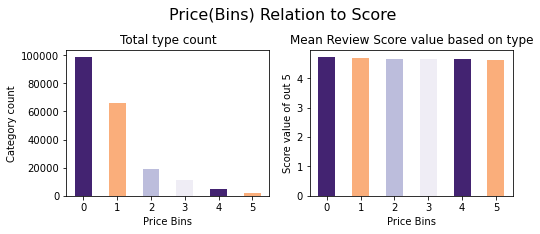

In [45]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8,3))
fig.suptitle('Price(Bins) Relation to Score', fontsize=16, y=1)
plt.subplots_adjust(top=0.80) # So that the suptitle does not overlap with the ax plot titles
    
X.groupby('price_bin').size().plot(kind='bar', ax=ax1, color=['#432371',"#FAAE7B", "#bcbddc", "#efedf5"])
ax1.set_xticklabels(labels=[0, 1, 2, 3, 4, 5], rotation=0)
ax1.set_title('Total type count')
ax1.set_xlabel('Price Bins')
ax1.set_ylabel('Category count')
    
X.groupby('price_bin').review_scores_value.mean().plot(kind='bar', ax=ax2, color=['#432371',"#FAAE7B", "#bcbddc", "#efedf5"])
ax2.set_xticklabels(labels=[0, 1, 2, 3, 4, 5], rotation=0)
ax2.set_title('Mean Review Score value based on type')
ax2.set_xlabel('Price Bins')  
ax2.set_ylabel('Score value of out 5')
plt.show()

In [100]:
all2 = []
all3 = []
for index, row in X.iterrows():
    sen = row['number_of_reviews'] * row['sentiment']
    tp = row['price'] * row['minimum_nights']
    all2.append(sen)
    all3.append(tp)

X['rvw_sent_mod'] = all2
X['total_price'] = all3


In [102]:
X['total_price'].describe()

count    202622.000000
mean        812.797134
std        3734.063072
min           2.000000
25%         100.000000
50%         213.000000
75%         510.000000
max      273750.000000
Name: total_price, dtype: float64

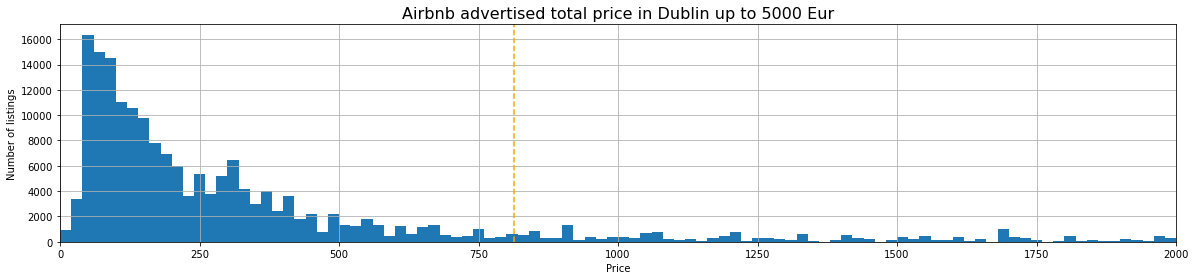

In [118]:
# Distribution of prices from £0 to £1000
plt.figure(figsize=(20,4))
X.total_price.hist(bins=100, range=(0,2000))
plt.margins(x=0)
plt.axvline(X.total_price.mean(), color='orange', linestyle='--')
plt.title("Airbnb advertised total price in Dublin up to 5000 Eur", fontsize=16)
plt.xlabel("Price")
plt.ylabel("Number of listings")
plt.show()

<AxesSubplot:>

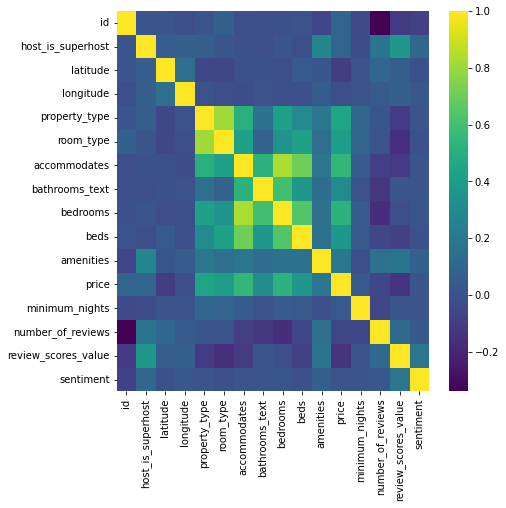

In [51]:
fig = plt.figure(figsize= (7,7))
sns.heatmap(X.corr(), annot=False, vmax=1, cmap='viridis', square=False)

In [46]:
X.room_type.value_counts()

1.000000    108091
0.000000     91398
3.000000      1928
2.000000       995
0.572438        10
Name: room_type, dtype: int64

In [47]:
X.loc[~X.room_type.isin([0, 1, 2, 3]), 'room_type'] = 0

In [48]:
X.room_type.value_counts()

1.0    108091
0.0     91408
3.0      1928
2.0       995
Name: room_type, dtype: int64

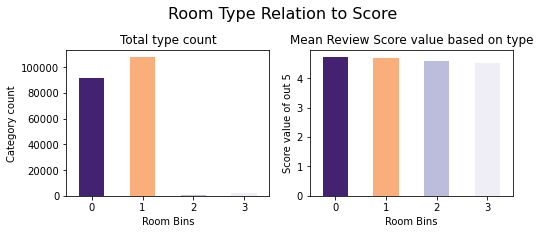

In [49]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8,3))
fig.suptitle('Room Type Relation to Score', fontsize=16, y=1)
plt.subplots_adjust(top=0.80) # So that the suptitle does not overlap with the ax plot titles
    
X.groupby('room_type').size().plot(kind='bar', ax=ax1, color=['#432371',"#FAAE7B", "#bcbddc", "#efedf5"])
ax1.set_xticklabels(labels=[0, 1, 2, 3], rotation=0)
ax1.set_title('Total type count')
ax1.set_xlabel('Room Bins')
ax1.set_ylabel('Category count')
    
X.groupby('room_type').review_scores_value.mean().plot(kind='bar', ax=ax2, color=['#432371',"#FAAE7B", "#bcbddc", "#efedf5"])
ax2.set_xticklabels(labels=[0, 1, 2, 3], rotation=0)
ax2.set_title('Mean Review Score value based on type')
ax2.set_xlabel('Room Bins')  
ax2.set_ylabel('Score value of out 5')
plt.show()

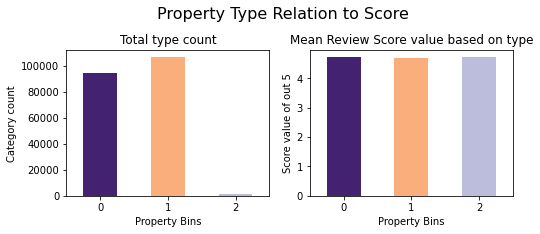

In [50]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8,3))
fig.suptitle('Property Type Relation to Score', fontsize=16, y=1)
plt.subplots_adjust(top=0.80) # So that the suptitle does not overlap with the ax plot titles
    
X.groupby('property_type').size().plot(kind='bar', ax=ax1, color=['#432371',"#FAAE7B", "#bcbddc", "#efedf5"])
ax1.set_xticklabels(labels=[0, 1, 2], rotation=0)
ax1.set_title('Total type count')
ax1.set_xlabel('Property Bins')
ax1.set_ylabel('Category count')
    
X.groupby('property_type').review_scores_value.mean().plot(kind='bar', ax=ax2, color=['#432371',"#FAAE7B", "#bcbddc", "#efedf5"])
ax2.set_xticklabels(labels=[0, 1, 2], rotation=0)
ax2.set_title('Mean Review Score value based on type')
ax2.set_xlabel('Property Bins')  
ax2.set_ylabel('Score value of out 5')
plt.show()

In [134]:
X = X.groupby("id", as_index=False).mean()

In [135]:
X.count()

id                     4949
host_is_superhost      4949
latitude               4949
longitude              4949
property_type          4949
room_type              4949
accommodates           4949
bathrooms_text         4949
bedrooms               4949
beds                   4949
amenities              4949
price                  4949
minimum_nights         4949
number_of_reviews      4949
review_scores_value    4949
sentiment              4949
rvw_sent_mod           4949
total_price            4949
dtype: int64